# Knowledge Engineering and Digital Humanities (SoSe 2021)

---

## Exercise 5.3 - Information Extraction and Knowledge Graphs

---

In [23]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Install the spaCy's model for English
# !python -m spacy download en_core_web_sm

In [2]:
# load spaCy's model for English
nlp_model = spacy.load('en_core_web_sm')

In [3]:
text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
        "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
        "the North Sea, London has been a major settlement for two millennia. " \
        "Londinium was founded by the Romans. The City of London, " \
        "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
        "the Square Mile − retains boundaries that follow closely its medieval limits." \
        "The City of Westminster is also an Inner London borough holding city status. " \
        "Greater London is governed by the Mayor of London and the London Assembly." \
        "London is located in the southeast of England." \
        "Westminster is located in London." \
        "London is the biggest city in Britain. London has a population of 7,172,036."

In [24]:
def get_sentences(text):
    # WRITE YOUR CODE - Use spaCy to split the text in sentences
    doc = nlp_model(text)
    sents = list(doc.sents)
    return sents

In [196]:
# DON'T DO ANYTHING
def print_token(token):
    print("\t", token.text, "->", token.dep_)

def append_chunk(original, chunk):
    return original + ' ' + chunk

def is_relation_candidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def is_construction_candidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [201]:
# COMMENT THE FOLLOWING FUNCTION
def process_subject_object_pairs(tokens):
    # Initialize the subject, object and relation
    subject = ''
    object = ''
    relation = ''
    subject_construction = ''
    object_construction = ''
    
    # Iterate through each token
    for token in tokens:
        # Prints the dependency of the token
        print_token(token)
        
        # Skip the iteration if the token is a punctuation
        # because a puntcuation does not take part in a relation
        if "punct" in token.dep_:
            continue
            
        # Check if the token has a dependency ["ROOT", "adj", "attr", "agent", "amod"]
        if is_relation_candidate(token):
            # Appends the lemma of the token to the relation
            relation = append_chunk(relation, token.lemma_)
            
        # Check if the token has a dependency ["compound", "prep", "conj", "mod"]
        if is_construction_candidate(token):
            # If construction text for either subject or object is not empty,
            # append the token to the construction text
            if subject_construction:
                subject_construction = append_chunk(subject_construction, token.text)
                
            if object_construction:
                object_construction = append_chunk(object_construction, token.text)
        
        # If the dependency of the token is 'subj', append the subject construction 
        # with the subject token
        if "subj" in token.dep_:
            subject = append_chunk(subject, token.text)
            subject = append_chunk(subject_construction, subject)
            subject_construction = ''
        
        # If the dependency of the token is 'obj', append the object construction 
        # with the object token
        if "obj" in token.dep_:
            object = append_chunk(object, token.text)
            object = append_chunk(object_construction, object)
            object_construction = ''

    print ("Relation:", subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

In [202]:
def print_graph(triples):
    # WRITE YOUR CODE - Use NetworkX to build and show the knowledge graph
    
    # Create a graph with NetworkX
    G = nx.Graph()
    
    # iterate through each triple
    for triple in triples:
        # Add subject and relation as an edge
        G.add_edge(triple[0], triple[1])
        
        # Add relation and object as an edge
        G.add_edge(triple[1], triple[2])
    
    # Plot the graph
    fig = plt.figure(figsize=(10, 8), dpi=150)
    nx.draw(G, with_labels=True, font_size=8)

In [203]:
def process_sentence(sentence):
    tokens = nlp_model(sentence)
    return process_subject_object_pairs(tokens)

Sentence: London is the capital and largest city of England and the United Kingdom.
	 London -> nsubj
	 is -> ROOT
	 the -> det
	 capital -> attr
	 and -> cc
	 largest -> amod
	 city -> conj
	 of -> prep
	 England -> pobj
	 and -> cc
	 the -> det
	 United -> compound
	 Kingdom -> conj
	 . -> punct
Relation: London , be capital large , England
--------------------------
Sentence: Standing on the River Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to the North Sea, London has been a major settlement for two millennia.
	 Standing -> advcl
	 on -> prep
	 the -> det
	 River -> compound
	 Thames -> pobj
	 in -> prep
	 the -> det
	 south -> compound
	 - -> punct
	 east -> pobj
	 of -> prep
	 England -> pobj
	 , -> punct
	 at -> prep
	 the -> det
	 head -> pobj
	 of -> prep
	 its -> poss
	 50-mile -> nummod
	 ( -> punct
	 80 -> nummod
	 km -> pobj
	 ) -> punct
	 estuary -> acomp
	 leading -> advcl
	 to -> prep
	 the -> det
	 North -> compound
	 Sea -> 

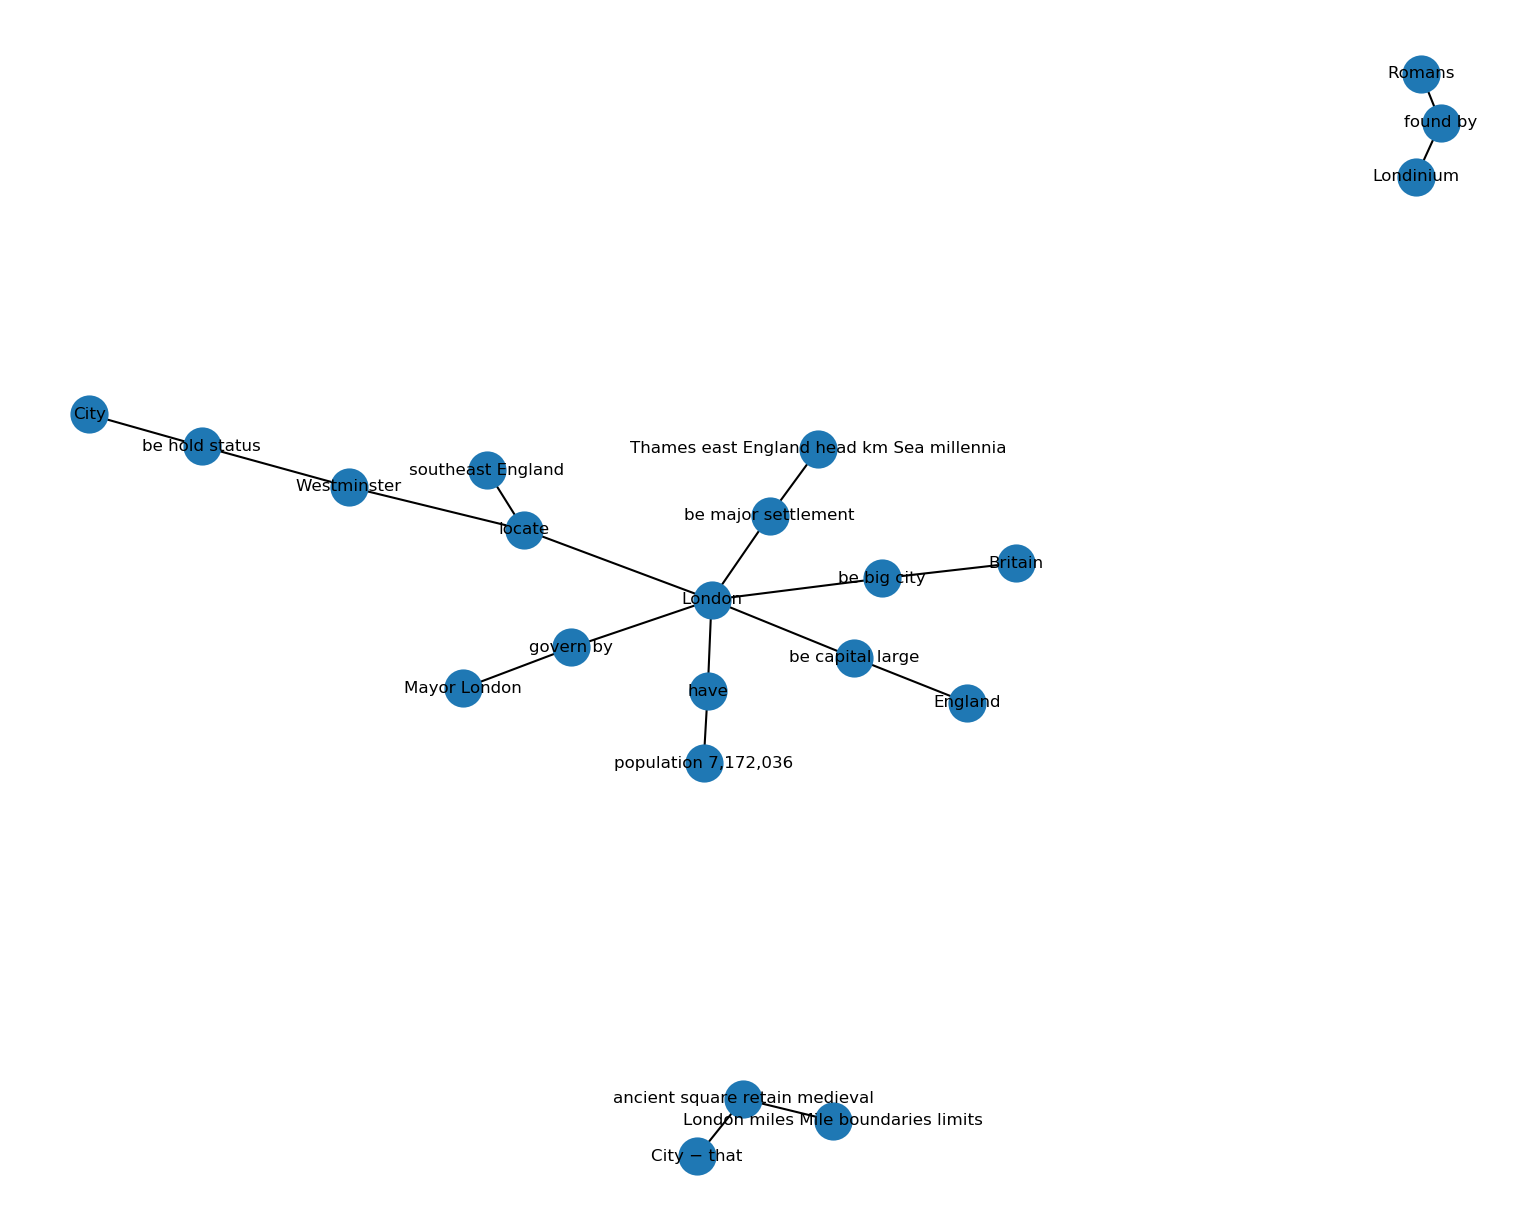

In [204]:
sentences = get_sentences(text)

triples = []
for s in sentences:
    print("Sentence:", s)
    triples.append(process_sentence(str(s)))
    print("--------------------------")
    
print_graph(triples)